# 성별에 따른 그래프 만들기

## #01. 패키지 참조

In [1]:
import sys
import pandas as pd
import numpy as np
from pandas import read_excel, DataFrame, pivot_table, melt, crosstab
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
origin = read_excel('musinsa_monthrank_data.xlsx')
origin

,상품명,종류,분류,성별,조회수,누적판매,선호연령,선호성별,남자선호비율_x,상품가격,제품소재,선호연령비율_y,~18세,19~23세,24~28세,29~33세,34~39세,40세~,남자선호비율_y,선호성별_여성
0,베이직 푸퍼_SPJPE11C11,아우터,숏패딩/숏헤비 아우터,남성,555000,75000,"19 28세,",남성,0.72,62910.0,겉감 폴리에스터100안감 폴리에스터100,"[58, 14, 10, 6, 4, 8]",58.0,14.0,10.0,6.0,4.0,8.0,0.72,0
1,삼바 OG - 블랙:화이트 / B75807,스니커즈,패션스니커즈화,NaN,153000,15000,"24 33세,",여성,0.29,139000.0,천연가죽(소),"[21, 20, 22, 14, 8, 15]",21.0,20.0,22.0,14.0,8.0,15.0,0.29,1
2,삼바 OG - 화이트:블랙 / B75806,스니커즈,패션스니커즈화,NaN,150000,16000,"24 33세,",여성,0.32,139000.0,천연가죽(소),"[22, 19, 20, 13, 9, 17]",22.0,19.0,20.0,13.0,9.0,17.0,0.32,1
3,솔리드 무톤 자켓,아우터,무스탕/퍼,공용,144000,9200,"19 28세,",남성,0.71,169000.0,"비건레더 100, FAUX FUR 100","[24, 33, 19, 10, 5, 9]",24.0,33.0,19.0,10.0,5.0,9.0,0.71,0
4,파스텔 푸퍼_SPJPE11G01,아우터,숏패딩/숏헤비 아우터,여성,245000,39000,"19 23세,",여성,0.11,62910.0,겉감 폴리에스터100안감 폴리에스터100,"[48, 16, 13, 7, 4, 12]",48.0,16.0,13.0,7.0,4.0,12.0,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,올 데이 세터 코튼 캐시미어 블렌드 가디건 클래식 블랙,아우터,카디건,공용,3300,50,"24 33세,",남성,0.71,159000.0,Cotton 95 Cahshmere 5,"[12, 17, 35, 21, 8, 7]",12.0,17.0,35.0,21.0,8.0,7.0,0.71,0
8680,우먼즈 오버사이즈 블레이저 [미디엄 그레이],아우터,슈트/블레이저 재킷,NaN,5000,1600,"24 33세,",여성,0.08,71290.0,"폴리에스터 67, 레이온 29, 폴리우레탄 4","[17, 14, 20, 19, 13, 17]",17.0,14.0,20.0,19.0,13.0,17.0,0.08,1
8681,우먼즈 캐시미어 블렌드 쇼트 맥 코트 [건메탈],아우터,겨울 싱글 코트,여성,3900,200,"24 33세,",여성,0.11,119890.0,"모 70, 캐시미어 10, 폴리에스터 10, 기타섬유 10","[19, 19, 25, 15, 8, 14]",19.0,19.0,25.0,15.0,8.0,14.0,0.11,1
8682,TRICH Light Liner Jacket (Black),아우터,블루종/MA-1,NaN,3100,250,"24 33세,",남성,0.95,180600.0,상세페이지 참조,"[20, 16, 31, 24, 5, 4]",20.0,16.0,31.0,24.0,5.0,4.0,0.95,0


In [4]:
df = origin.copy()

# df.dropna(subset=['성별','선호성별'], inplace=True)
df

,상품명,종류,분류,성별,조회수,누적판매,선호연령,선호성별,남자선호비율_x,상품가격,제품소재,선호연령비율_y,~18세,19~23세,24~28세,29~33세,34~39세,40세~,남자선호비율_y,선호성별_여성
0,베이직 푸퍼_SPJPE11C11,아우터,숏패딩/숏헤비 아우터,남성,555000,75000,"19 28세,",남성,0.72,62910.0,겉감 폴리에스터100안감 폴리에스터100,"[58, 14, 10, 6, 4, 8]",58.0,14.0,10.0,6.0,4.0,8.0,0.72,0
1,삼바 OG - 블랙:화이트 / B75807,스니커즈,패션스니커즈화,NaN,153000,15000,"24 33세,",여성,0.29,139000.0,천연가죽(소),"[21, 20, 22, 14, 8, 15]",21.0,20.0,22.0,14.0,8.0,15.0,0.29,1
2,삼바 OG - 화이트:블랙 / B75806,스니커즈,패션스니커즈화,NaN,150000,16000,"24 33세,",여성,0.32,139000.0,천연가죽(소),"[22, 19, 20, 13, 9, 17]",22.0,19.0,20.0,13.0,9.0,17.0,0.32,1
3,솔리드 무톤 자켓,아우터,무스탕/퍼,공용,144000,9200,"19 28세,",남성,0.71,169000.0,"비건레더 100, FAUX FUR 100","[24, 33, 19, 10, 5, 9]",24.0,33.0,19.0,10.0,5.0,9.0,0.71,0
4,파스텔 푸퍼_SPJPE11G01,아우터,숏패딩/숏헤비 아우터,여성,245000,39000,"19 23세,",여성,0.11,62910.0,겉감 폴리에스터100안감 폴리에스터100,"[48, 16, 13, 7, 4, 12]",48.0,16.0,13.0,7.0,4.0,12.0,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,올 데이 세터 코튼 캐시미어 블렌드 가디건 클래식 블랙,아우터,카디건,공용,3300,50,"24 33세,",남성,0.71,159000.0,Cotton 95 Cahshmere 5,"[12, 17, 35, 21, 8, 7]",12.0,17.0,35.0,21.0,8.0,7.0,0.71,0
8680,우먼즈 오버사이즈 블레이저 [미디엄 그레이],아우터,슈트/블레이저 재킷,NaN,5000,1600,"24 33세,",여성,0.08,71290.0,"폴리에스터 67, 레이온 29, 폴리우레탄 4","[17, 14, 20, 19, 13, 17]",17.0,14.0,20.0,19.0,13.0,17.0,0.08,1
8681,우먼즈 캐시미어 블렌드 쇼트 맥 코트 [건메탈],아우터,겨울 싱글 코트,여성,3900,200,"24 33세,",여성,0.11,119890.0,"모 70, 캐시미어 10, 폴리에스터 10, 기타섬유 10","[19, 19, 25, 15, 8, 14]",19.0,19.0,25.0,15.0,8.0,14.0,0.11,1
8682,TRICH Light Liner Jacket (Black),아우터,블루종/MA-1,NaN,3100,250,"24 33세,",남성,0.95,180600.0,상세페이지 참조,"[20, 16, 31, 24, 5, 4]",20.0,16.0,31.0,24.0,5.0,4.0,0.95,0


## #02. 착용권장 성별에 따른 비율 

무신사 실시간 랭킹 아이템을 조사한 결과  
공용상품은 n%, 남성용은 n%, 여성용은 n%, 라이프는 n% 로 공용상품의 랭킹 비중이 가장 높은걸 알 수 있다.

In [5]:
categoryRatio = df['성별'].value_counts()
# categoryRatio

value_to_drop = ['라이프','공용, 라이프']
categoryRatio = categoryRatio[~categoryRatio.index.isin(value_to_drop)]
# categoryRatio

data = list(categoryRatio.values)
labaels = list(categoryRatio.index)
print("데이터:",data)
print("라벨:",labaels)

데이터: [2534, 2435, 1143, 7]
라벨: ['남성', '공용', '여성', '공용, ']


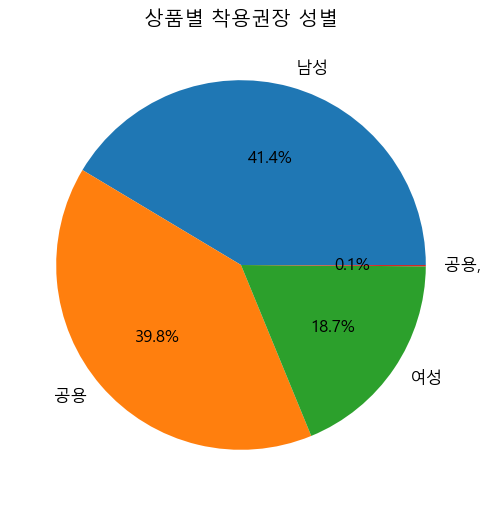

In [6]:
plt.figure()
plt.title("상품별 착용권장 성별")
plt.pie(data, labels=labaels, autopct='%0.1f%%')
plt.show()
plt.close()

## #03. 공용 상품에 대한 남녀 선호도 조사

In [28]:
# 성별에서 공용만 가져오기

gender_type = df[df['성별']=='공용']
gender_type

,상품명,종류,분류,성별,조회수,누적판매,선호연령,선호연령비율,선호성별,남자선호비율,여자선호비율,상품가격,제품소재,색상
0,와이드 데님 팬츠 [그레이],바지,데님 팬츠,공용,144000,8500,"23세 이하,","['~18세42,19~23세21,24~28세12,29~33세7,34~39세4,40세...",남성,0.75,0.25,21200.0,COTTON 100%,"BLACK, GRAY, RAW DENIM, MEDIUM BLUE"
2,핸드볼 스페지알 - 핑크 / IF6561,스니커즈,패션스니커즈화,공용,79000,1600,"24 33세,","['~18세18,19~23세16,24~28세24,29~33세18,34~39세11,4...",여성,0.34,0.66,139000.0,상품 Tag 참고,핑크
4,워셔블 아란 케이블 후드 집업 니트 (IVORY),상의,니트/스웨터,공용,186000,4600,"19 28세,","['~18세24,19~23세27,24~28세23,29~33세10,34~39세5,40...",여성,0.36,0.64,39900.0,Acryl 80%Nylon 20%,아이보리
8,울리치 발마칸 오버 코트_Black,아우터,겨울 싱글 코트,공용,270000,9600,"19 28세,","['~18세27,19~23세26,24~28세21,29~33세12,34~39세6,40...",남성,0.74,0.26,95900.0,Wool 70% Poly 30%,상세페이지 참조
10,(기모옵션추가) 이지 와이드 데님 팬츠 그레이,바지,데님 팬츠,공용,292000,88000,"19 28세,","['~18세39,19~23세24,24~28세13,29~33세7,34~39세3,40세...",남성,0.74,0.26,36800.0,COTTON 100%,GRAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,My cat is Rockstar Baseball cap (Black),모자,캡/야구 모자,공용,900,250,"19 28세,","['~18세33,19~23세40,24~28세14,29~33세8,34~39세2,40세...",여성,0.14,0.86,55000.0,나일론 캡,NYLON 100%
5439,미시간 울버린 피그먼트 후드티 다크 블루,상의,후드 티셔츠,공용,6100,2100,"19 23세,","['~18세41,19~23세13,24~28세11,29~33세9,34~39세7,40세...",여성,0.43,0.57,54900.0,COTTON 100%,네이비
5442,VNBC THECATS 레글런 후드티,상의,후드 티셔츠,공용,2800,150,"19 23세,","['~18세62,19~23세17,24~28세5,29~33세3,34~39세1,40세~...",여성,0.27,0.73,54900.0,면 65% 폴리 35%,상세페이지 참조
5446,메타그린 슬림업 리필 60일,뷰티,다이어트/헬스,공용,350,50,"24 28세,","['~18세19,19~23세26,24~28세30,29~33세7,34~39세3,40세...",여성,0.15,0.85,54000.0,바이탈뷰티 메타그린 슬림업(30일),건강기능식품


In [29]:
# 각 성별의 개수 가져오기

gender_count = gender_type.groupby('선호성별').count()
gender_count

,상품명,종류,분류,성별,조회수,누적판매,선호연령,선호연령비율,남자선호비율,여자선호비율,상품가격,제품소재,색상
선호성별,,,,,,,,,,,,,
남성,693,692,692,693,693,693,693,693,693,693,693,569,478
여성,445,445,445,445,445,445,445,445,445,445,445,344,298


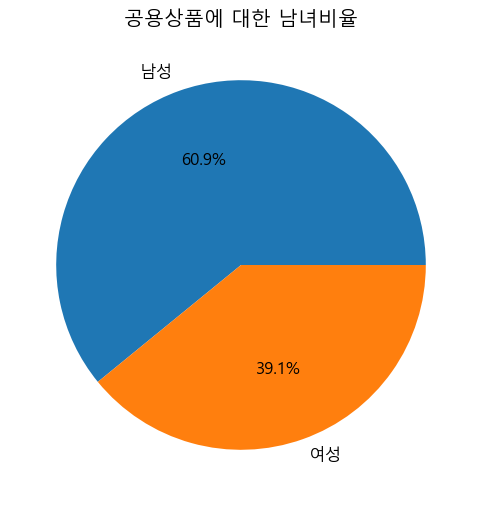

In [30]:
gender_count['상품명'].plot.pie(autopct='%0.1f%%')
plt.title("공용상품에 대한 남녀비율")
plt.ylabel("")
plt.show()
plt.close()

## #03. 전체 상품에 대한 남녀선호도로 재정립

In [31]:
dressRatio = df['선호성별'].value_counts()

data = list(dressRatio.values)
labaels = list(dressRatio.index)
print("데이터:",data)
print("라벨:",labaels)

데이터: [1815, 1260]
라벨: ['남성', '여성']


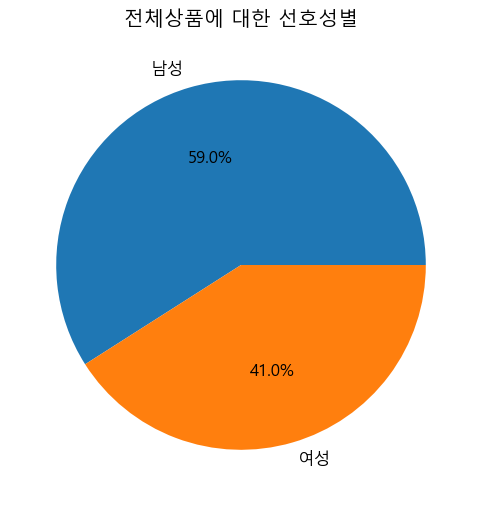

In [32]:
plt.figure()
plt.title("전체상품에 대한 선호성별")
plt.pie(data, labels=labaels, autopct='%0.1f%%')
plt.show()
plt.close()

## #04. 정리글

